In [1]:
#loading libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
#loading datasets
trainset=pd.read_csv('train_age_dataset.csv')
testset = pd.read_csv("test_age_dataset.csv")

In [3]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [4]:
trainset.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [5]:
trainset.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [6]:
print("age group")
trainset['age_group'].describe()

age group


count    488877.000000
mean          1.741643
std           1.088559
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: age_group, dtype: float64

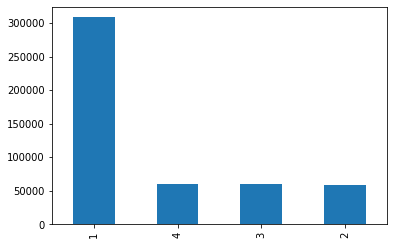

In [7]:
trainset["age_group"].value_counts().plot(kind = "bar")

In [8]:
trainset["age_group"].value_counts()

1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

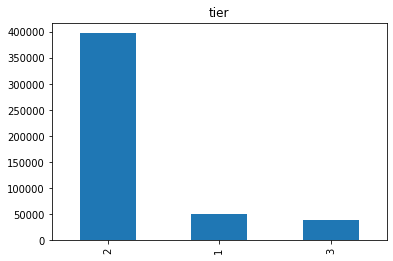

In [9]:
plt.title('tier')
trainset['tier'].value_counts().plot.bar()

In [10]:
#yo = trainset.drop(['Unnamed: 0', 'userId']).describe()
#yo

In [11]:
print('Number of duplicates: ',trainset.duplicated().sum())

Number of duplicates:  0


In [12]:
y = trainset.age_group
X = trainset.drop(['Unnamed: 0', 'userId','age_group'], axis=1)



In [13]:
X.shape

(488877, 24)

In [14]:
y.shape

(488877,)

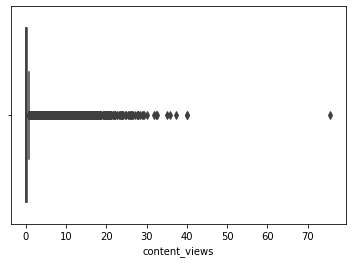

In [33]:
import seaborn as sns
sns.boxplot(x=X['content_views'])

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
feature = ExtraTreesClassifier()
feature.fit(X,y)

score = feature.feature_importances_
score

array([0.01250592, 0.00311092, 0.0470494 , 0.03691703, 0.03472383,
       0.03254394, 0.00096183, 0.00336648, 0.01379331, 0.10207676,
       0.0485269 , 0.04507218, 0.04862948, 0.01279278, 0.12687002,
       0.04988903, 0.0142584 , 0.041256  , 0.04811071, 0.02444894,
       0.03977073, 0.04119513, 0.04263915, 0.12949111])

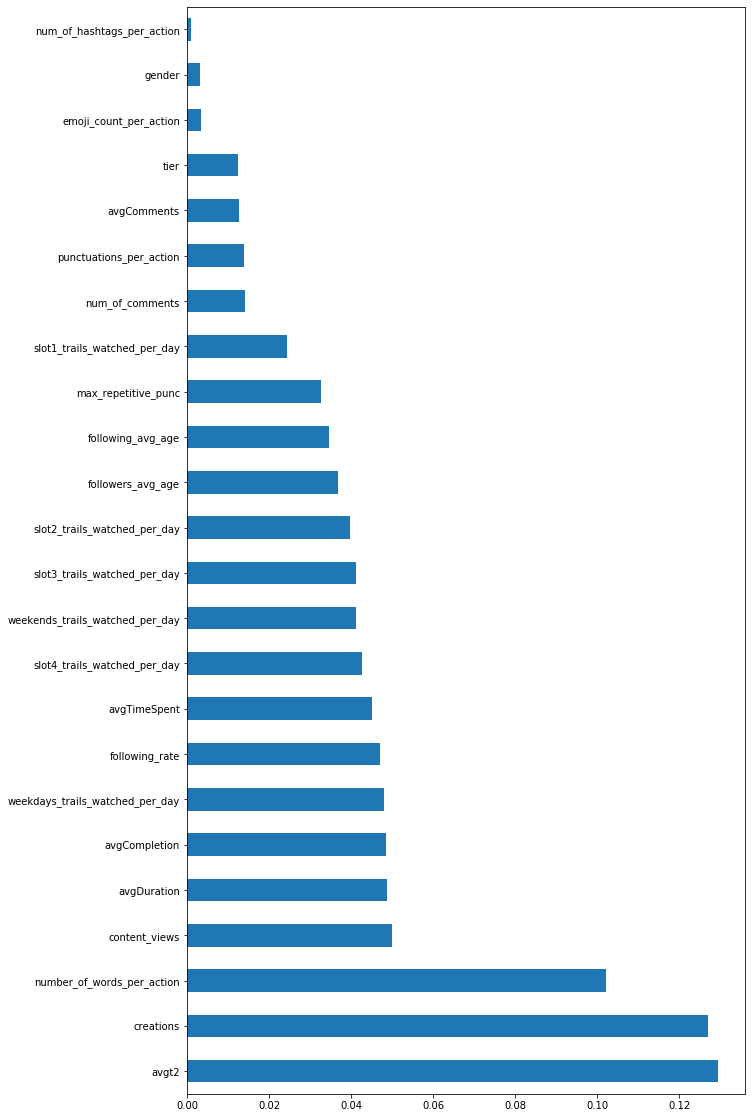

In [16]:
feat_score = pd.Series(score, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(10,20))
feat_score.plot(kind='barh')
plt.show()

In [31]:
top_feature = list(feat_score.index[0:21])
top_feature

['avgt2',
 'creations',
 'number_of_words_per_action',
 'content_views',
 'avgDuration',
 'avgCompletion',
 'weekdays_trails_watched_per_day',
 'following_rate',
 'avgTimeSpent',
 'slot4_trails_watched_per_day',
 'weekends_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot2_trails_watched_per_day',
 'followers_avg_age',
 'following_avg_age',
 'max_repetitive_punc',
 'slot1_trails_watched_per_day',
 'num_of_comments',
 'punctuations_per_action',
 'avgComments',
 'tier']

In [32]:
feat_score

avgt2                              0.129491
creations                          0.126870
number_of_words_per_action         0.102077
content_views                      0.049889
avgDuration                        0.048629
avgCompletion                      0.048527
weekdays_trails_watched_per_day    0.048111
following_rate                     0.047049
avgTimeSpent                       0.045072
slot4_trails_watched_per_day       0.042639
weekends_trails_watched_per_day    0.041256
slot3_trails_watched_per_day       0.041195
slot2_trails_watched_per_day       0.039771
followers_avg_age                  0.036917
following_avg_age                  0.034724
max_repetitive_punc                0.032544
slot1_trails_watched_per_day       0.024449
num_of_comments                    0.014258
punctuations_per_action            0.013793
avgComments                        0.012793
tier                               0.012506
emoji_count_per_action             0.003366
gender                          

In [19]:
trainset_imp = trainset[top_feature]
testset_imp = testset[top_feature]

print(trainset_imp.shape)
print(testset_imp.shape)


# Standarize features
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)

(488877, 18)
(54320, 18)


In [20]:
# train test split

from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(trainset_imp,y,test_size=0.3,random_state=4)
print(x_train.shape)

print(x_test.shape)



(342213, 18)
(146664, 18)


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

scaler.transform(x_train)
scaler.transform(x_test)

array([[ 1.03914436e-01, -5.87024568e-03, -2.20969335e-01, ...,
        -2.34060040e-01, -1.66475953e-01, -6.85206574e-02],
       [-7.36428443e-02,  8.01315087e-02,  3.95441193e-02, ...,
         6.08840716e+00,  3.82372059e-02,  1.55699843e+00],
       [ 2.59933117e-02, -6.76126816e-02,  6.08894247e-01, ...,
        -2.34060040e-01, -1.66475953e-01, -6.85206574e-02],
       ...,
       [-1.67628875e-01, -8.78719207e-02, -2.60113843e-01, ...,
        -2.34060040e-01, -1.66475953e-01, -6.85206574e-02],
       [ 8.67750631e-03, -7.80129405e-02,  1.18823297e+00, ...,
        -2.34060040e-01, -1.66475953e-01, -6.85206574e-02],
       [-1.67628875e-01, -8.78719207e-02, -2.60113843e-01, ...,
        -2.34060040e-01, -1.66475953e-01, -6.85206574e-02]])

In [22]:
from sklearn.ensemble import RandomForestClassifier as RFS
model = RFS(random_state=24,n_estimators=250,max_depth=20)

#model.fit(x_train,y_train)

model.fit(x_train,y_train)

y_predict = model.predict(x_test)


In [23]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7237495227185948


In [24]:
print("f1score:", metrics.f1_score(y_test, y_predict , average='weighted'))

f1score: 0.7229461206845108


In [25]:
predictions = model.predict(testset_imp)

In [26]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#res.index = testset_imp.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)  

In [27]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

#Predicting the response for test dataset
y_pred = model.predict(x_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("f1score:", metrics.f1_score(y_test, y_predict , average='weighted'))

Accuracy: 0.7237495227185948
f1score: 0.7229461206845108


In [29]:
prediction = model.predict(testset_imp)
rest = pd.DataFrame(prediction) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#rest.index = testset_imp.index 
rest.columns = ["prediction"]
rest.to_csv("prediction_result.csv", index = False)  